In [1]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with h5py.File("alldata.hdf5",'r') as f:
    dat = {k:f[k][:] for k in f.keys()}

Text(0, 0.5, 'U')

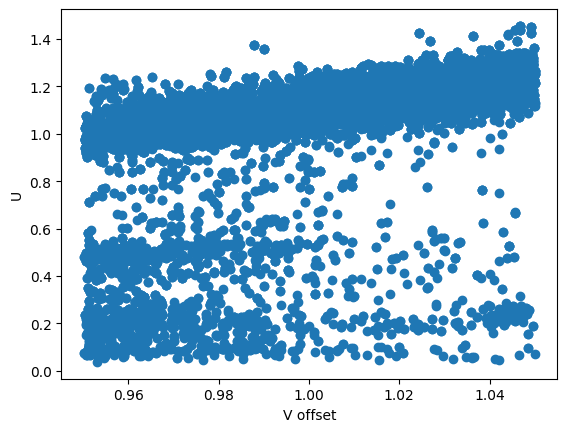

In [15]:
plt.scatter(dat['V_offset'].flatten(), dat['U_i'].flatten())
plt.xlabel("V offset")
plt.ylabel("U")

Text(0, 0.5, 'U')

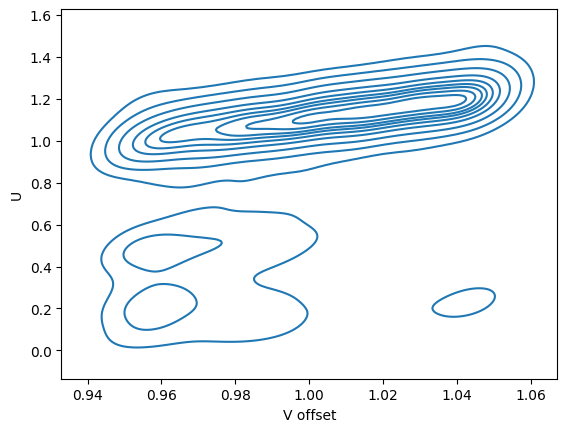

In [28]:
sns.kdeplot(x=dat['V_offset'].flatten(), y=dat['U_i'].flatten())
plt.xlabel("V offset")
plt.ylabel("U")

In [18]:
import scipy.spatial

nsamples = dat['trap_centers'].shape[0]
dat['rij'] = np.zeros((dat['trap_centers'].shape[0], dat['trap_centers'].shape[1], dat['trap_centers'].shape[1]))
dat['rx_ij'] = np.zeros((dat['trap_centers'].shape[0], dat['trap_centers'].shape[1], dat['trap_centers'].shape[1]))
dat['ry_ij'] = np.zeros((dat['trap_centers'].shape[0], dat['trap_centers'].shape[1], dat['trap_centers'].shape[1]))

for i,r in enumerate(dat['trap_centers']):
    dat['rij'][i,:,:] = scipy.spatial.distance_matrix(r,r)


Text(0, 0.5, 'tij')

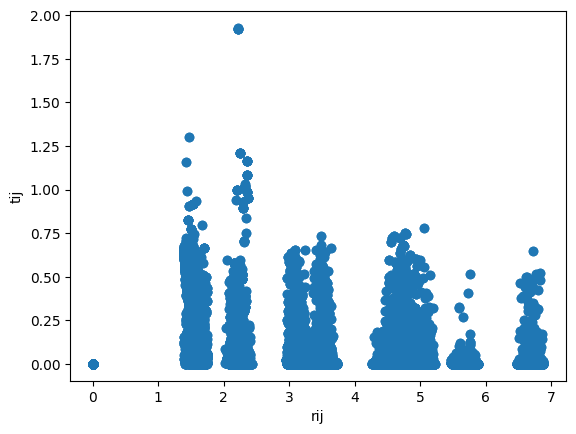

In [19]:
plt.scatter(dat['rij'].flatten(), dat['t_ij'].flatten())
plt.xlabel("rij")
plt.ylabel("tij")

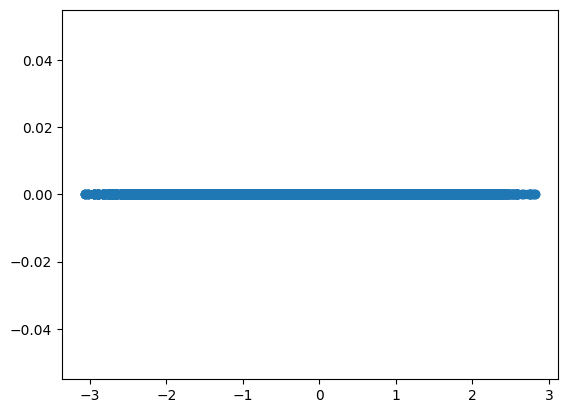

In [13]:
plt.scatter(dat['V_i'].flatten(), dat['t_ij'].diagonal(axis1=1, axis2=2).flatten())


(-0.05, 0.5)

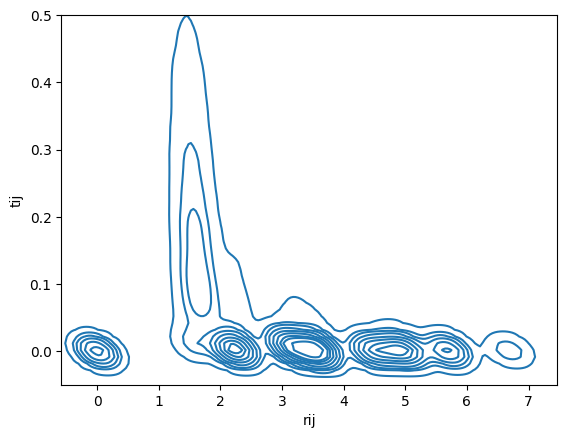

In [24]:
sns.kdeplot(x=dat['rij'].flatten(), y=dat['t_ij'].flatten())
plt.xlabel("rij")
plt.ylabel("tij")
plt.ylim(-.05,0.50)

In [26]:
np.sum(dat['t_ij'] < 0)

0

(1.25, 1.9)

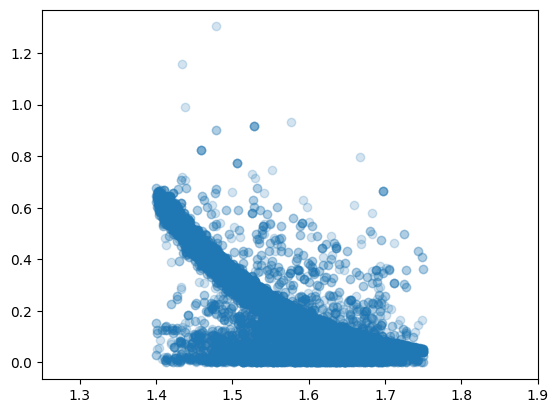

In [33]:
mask = dat['rij'].flatten() < 1.9

plt.scatter(x=dat['rij'].flatten()[mask], y=dat['t_ij'].flatten()[mask], alpha=0.1)
plt.xlim(1.25,1.9)

(1.25, 1.9)

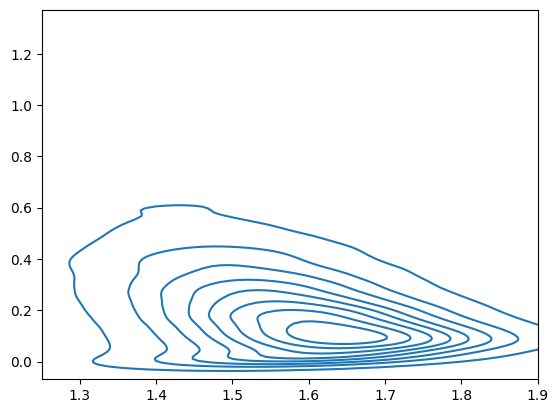

In [35]:
sns.kdeplot(x=dat['rij'].flatten()[mask], y=dat['t_ij'].flatten()[mask])
plt.xlim(1.25,1.9)